<a href="https://colab.research.google.com/github/Olympiah/Image-Classification/blob/main/ImageClassifierProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q torch==1.13.1 torchvision

     |████████████████████████████████| 17.3 MB 1.2 MB/s 
     |████████████████████████████████| 12.8 MB 65.5 MB/s 
     |████████████████████████████████| 12.7 MB 1.3 MB/s 
     |████████████████████████████████| 11.8 MB 95.8 MB/s 
     |████████████████████████████████| 5.9 MB 282 kB/s 
     |████████████████████████████████| 6.6 MB 1.7 MB/s 
     |████████████████████████████████| 6.6 MB 179 kB/s 
     |████████████████████████████████| 4.0 MB 57.3 MB/s 
     |████████████████████████████████| 10.2 MB 46.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.3.1 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.3.1 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.3.1 which is incompatible.
fastai 2.7.10 requires torchv

In [ ]:
!pip3 install --upgrade torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.13.0-cp37-cp37m-manylinux1_x86_64.whl (890.2 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
     |████████████████████████████████| 557.1 MB 11 kB/s 
     |████████████████████████████████| 317.1 MB 32 kB/s 
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.4.2 requires torch==1.3.1, but you have torch 1.13.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.13.0 which is incompatible.
torchaudio 0.12.1+cu113 requires 

In [ ]:
%cd .
!if ! test -d aipnd-project/; then git clone https://github.com/udacity/aipnd-project.git ; fi  
%cd aipnd-project/
!mkdir -p flowers/
%cd flowers/
!wget -nc https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
!if ! test -d test/; then tar -xzf flower_data.tar.gz; fi  
!ls -l
%cd ./aipnd-project/
!ls -l

/content/aipnd-project/flowers
Cloning into 'aipnd-project'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 59 (delta 20), reused 20 (delta 20), pack-reused 37
Unpacking objects: 100% (59/59), done.
/content/aipnd-project/flowers/aipnd-project
/content/aipnd-project/flowers/aipnd-project/flowers
--2022-11-26 12:44:35--  https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.227.152, 52.217.197.248, 52.216.61.240, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.227.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344873452 (329M) [application/x-gzip]
Saving to: ‘flower_data.tar.gz’

flower_data.tar.gz  100%[===================>] 328.90M  99.4MB/s    in 3.4s    

2022-11-26 12:44:39 (96.0 MB/s) - ‘flower_data.tar.gz’ saved [344873452/344873452]

total 336804
-rw-r--r--   1

In [ ]:
%cd /content/aipnd-project/
!ls -l
%cd /content/
!ls -l

/content/aipnd-project
total 44
drwxr-xr-x 2 root root  4096 Nov 26 12:44  assets
-rw-r--r-- 1 root root  2218 Nov 26 12:44  cat_to_name.json
-rw-r--r-- 1 root root    42 Nov 26 12:44  CODEOWNERS
drwxr-xr-x 6 root root  4096 Nov 26 12:44  flowers
-rw-r--r-- 1 root root 17748 Nov 26 12:44 'Image Classifier Project.ipynb'
-rw-r--r-- 1 root root  1064 Nov 26 12:44  LICENSE
-rw-r--r-- 1 root root     0 Nov 26 12:44  predict.py
-rw-r--r-- 1 root root   250 Nov 26 12:44  README.md
-rw-r--r-- 1 root root     0 Nov 26 12:44  train.py
/content
total 8
drwxr-xr-x 6 root root 4096 Nov 26 12:44 aipnd-project
drwxr-xr-x 1 root root 4096 Nov 22 00:14 sample_data


In [ ]:
# import depencencies

import torch 
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image

import json

In [ ]:
data_dir = '/content/aipnd-project/flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:

#First, define train transformations(i.e. random scaling, cropping and flipping)
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                      ])

#test transformations (N/B: no need for scaling or rotation but resize and crop to standard size)
test_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])
                                     ])
#validation transformations
validation_transform = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])
                                           ])


# TODO: Load the datasets with ImageFolder

#loading the train dataset
train_dataset = datasets.ImageFolder(train_dir, transform = train_transform)

#loading the test dataset
test_dataset = datasets.ImageFolder(test_dir, transform = test_transform)

#loading the validation dataset
validation_dataset = datasets.ImageFolder(valid_dir, transform = validation_transform)


# TODO: Using the image datasets and the trainforms, define the dataloaders
#loading train dataset randomly in batches of 32 
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)

testloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32)
validationloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32)

In [ ]:
# mapping integer encoded category to names
with open('/content/aipnd-project/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
#Recall that the dataset is a 102 Category Flower Dataset, this is just to confirm so
output_categories = len(cat_to_name)
output_categories

102

BUILDING AND TRAINING THE MODEL

In [ ]:
#At first I had used vgg16pretrained model but I realized it is slow to train, so decided to make changes
#Below I am using vgg16_bn which is similar to vgg16 but incooperates batch normalization hence faster.

#A point to note: we do not really need the  we don’t need bias in conv layer if the batch normalization
#layer follows immediately after convolution, it can be disabled in the constructor

model = models.vgg16_bn(pretrained = True)
model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
# CUDA - computational power useful for training

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:

 # Freezing the params in order to avoid Backpropagating
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Since our classifier is different from that of VGG, we shall update it using ReLU activations and dropout
# NOTE: We have a 102 category dataset, consisting of 102 flower categories
classifier = nn.Sequential(nn.Linear(25088, 4096, bias = True),
                           nn.ReLU(),
                           nn.Dropout(p = 0.5),
                           nn.Linear(4096,102),
                           nn.LogSoftmax(dim=1)
                          )
model.classifier = classifier

#define the criterion to NLLLoss(for calculating the loss) since we are using LogSoftmax in our outputs
criterion = nn.NLLLoss()

#NOTE: Only Train the classifier parameters 

#define the optimizer - responsible for updating the weights
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.002)

# Changing module to device which is either "cuda for GPU" or cpu
model.to(device);

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=102, bias=True)
  (4): LogSoftmax(dim=1)
)

In [ ]:
#Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )

TRAINING THE MODEL


In [ ]:
epochs = 10 # the number of times you loop through the dataset
steps = 0
# batch = 0
print_every = 20
running_loss = 0

# with active_session():

print("Training process initializing .....\n")

for epoch in range(epochs): # for every epochs in the range do the following below
    model.train() #entering training mode
    for inputs, labels in trainloader: #the inputs are in form of images
            # note:steps are the batches which consist of 64 images
            steps += 1 
            # Moving the input and label tensors to the default device which is the GPU
            inputs, labels = inputs.to(device), labels.to(device)
        
            #zeros all gradients on each training parts to avoid accumulation of gradients.
            optimizer.zero_grad()
        
            #outputs is the log probabilities of the categories/classes
            logps = model.forward(inputs)
        
            #calculating the losses
            loss = criterion(logps, labels)
        
            #calculating the gradients
            loss.backward()
        
            #updating the weights
            optimizer.step()

            running_loss += loss.item()
        
            if steps % print_every == 0:
                validation_loss = 0
                accuracy = 0
#                 batch +=1
            
                #Notifying the layers you are enetring evaluation mode
                model.eval()
                # deativates autograd thus disabling gradients calculation(reduces memory consumption)
                with torch.no_grad():
                    for inputs, labels in validationloader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        logps = model.forward(inputs)
                        batch_loss = criterion(logps, labels)
                    
                        validation_loss += batch_loss.item()
                    
                        # Calculate accuracy 
                    
                        #converting the log probabilities to real probabilities
                        ps = torch.exp(logps)
                        #Getting the most likely class(NOTE: returns top_values and the top_kindices)
                        top_p, top_class = ps.topk(1, dim=1)
                    
                        #Checking if the predicted class matches the label
                        equals = top_class == labels.view(*top_class.shape)
                    
                        #accuracy = % of classes prodeicted correctly
                        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    
                 #printing the training, validation losses and test accuracy with a precision of 3 decimals
                #NOTE: Objective is to reduce the training loss and validation losss thus it should be dropping with every epoch
            
                print(f"Epoch {epoch+1}/{epochs} .. "
                      f"Training loss: {running_loss/print_every:.3f}.. "
                      f"Validation loss: {validation_loss/len(testloader):.3f}.. "
                      f"Test accuracy: {accuracy/len(testloader):.3f}")
                running_loss = 0
            
                #Returning back to trainng mode
                model.train()
    
        
print('Your Training is DONE!')        
    

    


Training process initializing .....

Epoch 1/10 .. Training loss: 9.965.. Validation loss: 4.065.. Test accuracy: 0.146
Epoch 1/10 .. Training loss: 3.866.. Validation loss: 3.141.. Test accuracy: 0.332
Epoch 1/10 .. Training loss: 3.080.. Validation loss: 2.268.. Test accuracy: 0.475
Epoch 1/10 .. Training loss: 2.600.. Validation loss: 1.773.. Test accuracy: 0.578
Epoch 1/10 .. Training loss: 2.202.. Validation loss: 1.508.. Test accuracy: 0.623
Epoch 2/10 .. Training loss: 2.062.. Validation loss: 1.406.. Test accuracy: 0.648
Epoch 2/10 .. Training loss: 1.947.. Validation loss: 1.209.. Test accuracy: 0.686
Epoch 2/10 .. Training loss: 1.842.. Validation loss: 1.121.. Test accuracy: 0.718
Epoch 2/10 .. Training loss: 1.846.. Validation loss: 1.102.. Test accuracy: 0.718
Epoch 2/10 .. Training loss: 1.685.. Validation loss: 1.004.. Test accuracy: 0.745
Epoch 3/10 .. Training loss: 1.646.. Validation loss: 0.963.. Test accuracy: 0.741
Epoch 3/10 .. Training loss: 1.703.. Validation lo

TESTING THE NETWORK

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# TODO: Do validation on the test set
test_accuracy = 0
for images,labels in testloader:
    model.eval()
    images,labels = images.to(device),labels.to(device)
    log_ps = model.forward(images)
    ps = torch.exp(log_ps)
    top_ps,top_class = ps.topk(1,dim=1)
    matches = (top_class == labels.view(*top_class.shape)).type(torch.FloatTensor)
    accuracy = matches.mean()
    test_accuracy += accuracy
print(f'Model Test Accuracy: {test_accuracy/len(testloader)*100:.2f}%')

Model Test Accuracy: 84.43%


Save the checkpoint
Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: image_datasets['train'].class_to_idx. You can attach this to the model as an attribute which makes inference easier later on.

model.class_to_idx = image_datasets['train'].class_to_idx

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, optimizer.state_dict. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
from torchvision.models.vgg import vgg16_bn
# TODO: Save the checkpoint :
#It loads the model in ordeer to make predicting easier as you do not have to train the model again
#The checkpoint also saves additional details about the model

model.class_to_idx = train_dataset.class_to_idx
model.to('cpu')             
checkpoint = {'input_size': 2208,
              'output_size': 102,
              'model':model, 
              'state_dict':model.state_dict(),
              'optimnizer_state_dict': optimizer.state_dict,
              'criterion': criterion,
              'classifier': classifier,
              'epochs': epochs,
              'class_to_idx': model.class_to_idx}
torch.save(checkpoint, 'checkpoint1.pth')   

**Loading the checkpoint**

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath,map_location = 'cpu')
    model = checkpoint["model"]
    model.class_to_idx = checkpoint['class_to_idx']
    model.load_state_dict(checkpoint['state_dict'])
    return model
model = load_checkpoint('checkpoint1.pth')

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

**Inference for classification**

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called predict that takes an image and a model, then returns the top  𝐾  most likely classes along with the probabilities. It should look like

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
First you'll need to handle processing the input image such that it can be used in your network.

Image Preprocessing
You'll want to use PIL to load the image (documentation). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training.

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the thumbnail or resize methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so np_image = np.array(pil_image).

As before, the network expects the images to be normalized in a specific way. For the means, it's [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225]. You'll want to subtract the means from each color channel, then divide by the standard deviation.

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using ndarray.transpose. The color channel needs to be first and retain the order of the other two dimensions.

In [ ]:
import PIL

def processing_image(image):
    
    # TODO: Process a PIL image for use in a PyTorch model
     
    img = PIL.Image.open(image)
    # Resize the image for uniromity
    img.thumbnail(size=(256,256))
    width, height = img.size
    
    #cropping the image
    width1,height1 = 224,224 
    left = (width - width1)/2
    top = (height - height1)/2
    right = (width + width1)/2
    bottom = (height + height1)/2
    img = img.crop((left, top, right, bottom))
    
    #Convert them to type tensor & Normalize
    transform_tensor = transforms.ToTensor()
    transform_normalize = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    tensor = transform_normalize(transform_tensor(img))
    # np_img = np_img.transpose((2,0,1))
    
    # Convert to numpy array
    n_img = np.array(tensor)
    # n_img = n_img.transpose((2,0,1))
    return n_img

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your process_image function works, running the output through this function should return the original image (except for the cropped out portions).

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # NOTE:PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax



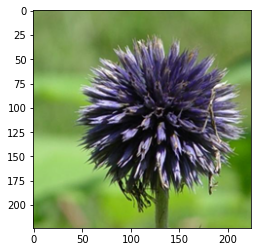

In [ ]:
#viewing the image
# https://view87cc5390.udacity-student-workspaces.com/view/aipnd-project/flowers/test/10/image_07104.jpg
image = data_dir +"/test/10/image_07104.jpg"
img = processing_image(image)
imshow(img)

<class 'str'>


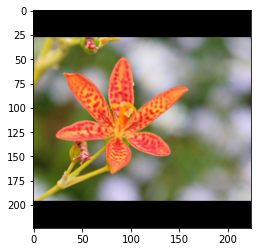

In [ ]:
#/content/aipnd-project/flowers/test/102/image_08012.jpg
image = data_dir +"/test/102/image_08012.jpg"
img = processing_image(image)
imshow(img)
print(type(image))

**Class Prediction**

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top- 𝐾 ) most probable classes. You'll want to calculate the class probabilities then find the  𝐾  largest values.

To get the top  𝐾  largest values in a tensor use x.topk(k). This method returns both the highest k probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using class_to_idx which hopefully you added to the model or from an ImageFolder you used to load the data (see here). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']

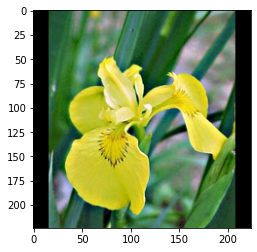

In [ ]:
image = '/content/aipnd-project/flowers/test/15/image_06351.jpg'
img = processing_image(image)
imshow(img)

In [248]:

def predict(imagepath, model, top_k = 5):#was topk = 5
    ''' Predict the class (or classes) of an image using a trained deep learning model which we saved.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # but GPU is not necessary
    
     
    # TODO: Implement the code to predict the class from an image file
    #loading image and processing 
    image = processing_image(imagepath)  
    
    #NOTE: DO NOT pass image to model.forward 'as is' as it is expecting tensor
    #converting to tensor
    img = torch.from_numpy(image).type(torch.FloatTensor)
    
    img = img.unsqueeze(dim = 0) #used to make size of torch as expected. as forward method is working with batches,
        
    with torch.no_grad():
        log_ps = model.forward (img)
    real_prob = torch.exp(log_ps) #getting the real probability
    
    probs, indeces = real_prob.topk(top_k)
    #converting back tensor to numpy array
    probs = probs.numpy () 
    indeces = indeces.numpy () 
    
    probs = probs.tolist () [0] #converting both to list
    indeces = indeces.tolist () [0]
    
    #converting to classes
    mapping = {val: key for key, val in
                model.class_to_idx.items()
                }
    
    classes = [mapping [item] for item in indeces]
    #replacing indeces with classes
    classes = np.array (classes) #converting to Numpy array 
    
    return probs, classes
   
   
    
        

In [252]:
#checking to seee it the above predict returns the probs and cls
imagep = '/content/aipnd-project/flowers/test/102/image_08012.jpg'

probs, classes = predict(imagep, model,5)
print("probabilities:\n", probs)
print("classes:\n",classes)
# print(type(imagepath))

probabilities:
 [0.06842032819986343, 0.05455343797802925, 0.047210365533828735, 0.04095332324504852, 0.040051378309726715]
classes:
 ['73' '65' '37' '99' '88']


Sanity Checking
Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use matplotlib to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

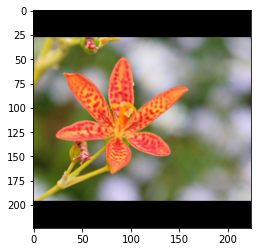

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


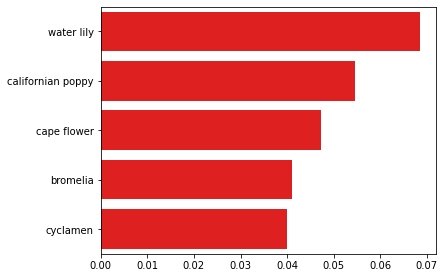

In [256]:
import seaborn as sns

# TODO: Display an image along with the top 5 classes
#first process the image then you can use predict
imagep = '/content/aipnd-project/flowers/test/102/image_08012.jpg'
img = processing_image(imagep)
imshow (img)
plt.show()

probs, classes = predict (imagep, model, 5)

#flower names
class_names = [cat_to_name [item] for item in classes]

# Set up plot
plt.figure(figsize = (6,10))
ax = plt.subplot(2,1,2)

# Plot flower
# Plot bar chart
plt.subplot(2,1,2)
sns.barplot(x=probs, y=class_names, color='red')
plt.show()

# CHALLENGES AND LESSONS LEARNT
So at the end of making this image classifier, this is what I have learnt Training the model is an iterative process, which requires patience.
 Furthermore it is better to start training when you have stable network I have been a victim of this as it is what has cost me much time. 
 Last but not least, Transfer Learning is the key to a model with high accuracy measure.


In [258]:
#get it as a HTML file
!!jupyter nbconvert --to html /content/aipnd-project/Image_Classifier_Project.ipynb


['[NbConvertApp] Converting notebook /content/aipnd-project/Image_Classifier_Project.ipynb to html',
 '[NbConvertApp] Writing 298621 bytes to /content/aipnd-project/Image_Classifier_Project.html']